In [233]:
import pickle
import pandas as pd
 
df=pd.read_csv('cricket.csv')
df.head(3)
df.shape


(37029, 15)

In [234]:
#removing columns
unwanted_columns=['mid','venue','bowler','batsman','striker','non-striker']
df.drop(labels=unwanted_columns,axis=1,inplace=True)

In [235]:
df.dropna(inplace=True)
#(37029, 15)


In [236]:
df.head(3)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0.0,222.0
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0.0,222.0
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0.0,222.0


In [237]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [238]:
# Selecting present teams
present_teams = ['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals', 'Mumbai Indians',
                 'Royal Challengers Bangalore', 'Kings XI Punjab','Delhi Daredevils']


In [239]:
df=df[(df['bat_team'].isin(present_teams)) & (df['bowl_team'].isin(present_teams))]

In [240]:
# removing first 5 overs data in every match
df=df[df['overs']>=5.0]

In [241]:
from datetime import datetime
format='%Y-%m-d%'

In [242]:
# converting date column from string to datatime object
df['date']=df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [245]:
#DATA PREPPROCESSING
# dealing with categorical features witth one hot encoding
encode_df = pd.get_dummies(data=df,columns=['bat_team','bowl_team']) 
encode_df.tail(3)


,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
37025,2012-05-14,127,3,16.5,27,2.0,158.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
37026,2012-05-14,127,4,16.6,27,3.0,158.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
37027,2012-05-14,128,4,17.1,28,2.0,158.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [246]:
# rearranging  the columns
# encode_df.columns
encode_df = encode_df[[ 'date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','total']]

In [265]:
#  Splitting the dataset
X_train = encode_df.drop(labels=['total'],axis=1)[encode_df['date'].dt.year <= 2011]
X_test  = encode_df.drop(labels='total',axis=1)[encode_df['date'].dt.year >=  2012]

In [251]:
X_test

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,runs,wickets,overs,runs_last_5,wickets_last_5
21099,2011-04-08,1,0,0,0,0,0,0,0,0,0,1,0,0,0,36,1,5.1,35,1.0
21100,2011-04-08,1,0,0,0,0,0,0,0,0,0,1,0,0,0,36,1,5.2,35,1.0
21101,2011-04-08,1,0,0,0,0,0,0,0,0,0,1,0,0,0,40,1,5.3,39,1.0
21102,2011-04-08,1,0,0,0,0,0,0,0,0,0,1,0,0,0,44,1,5.4,39,1.0
21103,2011-04-08,1,0,0,0,0,0,0,0,0,0,1,0,0,0,45,1,5.5,40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37023,2012-05-14,0,0,0,1,0,0,0,1,0,0,0,0,0,0,125,3,16.3,26,2.0
37024,2012-05-14,0,0,0,1,0,0,0,1,0,0,0,0,0,0,126,3,16.4,27,2.0
37025,2012-05-14,0,0,0,1,0,0,0,1,0,0,0,0,0,0,127,3,16.5,27,2.0
37026,2012-05-14,0,0,0,1,0,0,0,1,0,0,0,0,0,0,127,4,16.6,27,3.0


In [266]:
y_train = encode_df[encode_df['date'].dt.year <= 2011]['total'].values
y_test  = encode_df[encode_df['date'].dt.year >= 2012]['total'].values

In [267]:
# droping date data
X_train.drop(labels=['date'],axis=1,inplace=True)
X_test.drop(labels=['date'],axis=1,inplace=True)


In [268]:
import numpy as np
#np.isnan(X_train.any()) #and gets False
#np.isfinite(X_test.all()) #and gets True
#np.all(np.isfinite(X_test))
#X_test.fillna(X_test.mean())     X_train.fillna(X_train.mean())
#X_train =X_train[~X_train.isin([np.nan, np.inf, -np.inf]).any(1)]



In [269]:
from sklearn.linear_model import LinearRegression
linregressor = LinearRegression()
linregressor.fit(X_train,y_train)
linregressor.predict(X_test)
linregressor.score(X_test,y_test)

0.5460695018931744

### IMPLEMENTING RIDGE REGRESSION 

In [272]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [284]:
ridge = Ridge()
parameters = {'alpha' :[1,2,3,5,10,15,20,25,30,40,50,100,200,300,500,600,650,700,750,800,900,950,1000]}
ridge_regressor = GridSearchCV(ridge,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 2, 3, 5, 10, 15, 20, 25, 30, 40, 50, 100,
                                   200, 300, 500, 600, 650, 700, 750, 800, 900,
                                   950, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [285]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
print(ridge_regressor.best_estimator_)


{'alpha': 1000}
-316.2486845407026
Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [288]:
prediction = ridge_regressor.predict(X_test)


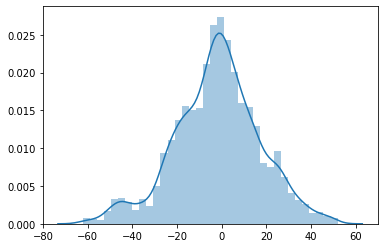

In [289]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [293]:
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE :  14.707967273898836
MSE :  367.62856263592425
RMSE :  19.173642393554864
